<a href="https://colab.research.google.com/github/Navya-Verma11/Python-and-ML-Major-Project/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression  # Add Linear Regression import
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectFromModel

In [2]:

# Load the air quality data
air_quality_data = pd.read_excel("/content/dataset delhi.xlsx")

# Load the AQI-US data
aqi_us_data = pd.read_excel("/content/Pollution Dataset.xlsx")
# Merge the datasets on the common 'AQI' column
merged_data = air_quality_data.merge(aqi_us_data, left_on='AQI', right_on='AQI-US', how='inner')

# Display the merged data
print(merged_data.head())

    City       Date  PM2.5_x  PM10_x     NO    NO2     NOx    NH3    CO  \
0  Delhi 2015-03-15    38.89   46.68   9.49  17.76   21.45  30.59  8.23   
1  Delhi 2015-03-15    38.89   46.68   9.49  17.76   21.45  30.59  8.23   
2  Delhi 2015-03-15    38.89   46.68   9.49  17.76   21.45  30.59  8.23   
3  Delhi 2015-07-22    38.97   85.89  19.43  41.41  132.19  36.49  2.73   
4  Delhi 2015-07-22    38.97   85.89  19.43  41.41  132.19  36.49  2.73   

     SO2  ...  Toluene  Xylene    AQI  AQI_Bucket         LOCATIONS Status  \
0   4.25  ...     4.45    1.38  165.0    Moderate              Loni   POOR   
1   4.25  ...     4.45    1.38  165.0    Moderate       Pooth Khurd   POOR   
2   4.25  ...     4.45    1.38  165.0    Moderate  Rohini Sector 30   POOR   
3  20.43  ...    16.67     NaN  165.0    Moderate              Loni   POOR   
4  20.43  ...    16.67     NaN  165.0    Moderate       Pooth Khurd   POOR   

  AQI-US PM2.5_y  PM10_y                                       Health Risks  
0 

In [3]:
merged_data

,City,Date,PM2.5_x,PM10_x,NO,NO2,NOx,NH3,CO,SO2,...,Toluene,Xylene,AQI,AQI_Bucket,LOCATIONS,Status,AQI-US,PM2.5_y,PM10_y,Health Risks
0,Delhi,2015-03-15,38.89,46.68,9.49,17.76,21.45,30.59,8.23,4.25,...,4.45,1.38,165.0,Moderate,Loni,POOR,165,83,103,Increased risk of respiratory infections (e.g....
1,Delhi,2015-03-15,38.89,46.68,9.49,17.76,21.45,30.59,8.23,4.25,...,4.45,1.38,165.0,Moderate,Pooth Khurd,POOR,165,83,111,Increased risk of respiratory infections (e.g....
2,Delhi,2015-03-15,38.89,46.68,9.49,17.76,21.45,30.59,8.23,4.25,...,4.45,1.38,165.0,Moderate,Rohini Sector 30,POOR,165,83,155,"Breathing discomfort for sensitive groups, Agg..."
3,Delhi,2015-07-22,38.97,85.89,19.43,41.41,132.19,36.49,2.73,20.43,...,16.67,NaN,165.0,Moderate,Loni,POOR,165,83,103,Increased risk of respiratory infections (e.g....
4,Delhi,2015-07-22,38.97,85.89,19.43,41.41,132.19,36.49,2.73,20.43,...,16.67,NaN,165.0,Moderate,Pooth Khurd,POOR,165,83,111,Increased risk of respiratory infections (e.g....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,Delhi,2020-04-23,54.71,127.82,9.42,24.83,22.92,30.02,0.91,17.39,...,17.19,0.01,129.0,Moderate,Janakpuri,POOR,129,47,88,"Breathing discomfort for sensitive groups, Agg..."
440,Delhi,2020-04-23,54.71,127.82,9.42,24.83,22.92,30.02,0.91,17.39,...,17.19,0.01,129.0,Moderate,Loni Dehat,POOR,129,47,72,Increased risk of respiratory infections (e.g....
441,Delhi,2020-05-29,24.62,66.66,5.14,19.02,14.69,32.19,0.77,9.95,...,10.48,0.03,129.0,Moderate,Hastsal,POOR,129,47,88,Increased risk of respiratory infections (e.g....
442,Delhi,2020-05-29,24.62,66.66,5.14,19.02,14.69,32.19,0.77,9.95,...,10.48,0.03,129.0,Moderate,Janakpuri,POOR,129,47,88,"Breathing discomfort for sensitive groups, Agg..."


In [4]:
merged_data.info

<bound method DataFrame.info of       City       Date  PM2.5_x  PM10_x     NO    NO2     NOx    NH3    CO  \
0    Delhi 2015-03-15    38.89   46.68   9.49  17.76   21.45  30.59  8.23   
1    Delhi 2015-03-15    38.89   46.68   9.49  17.76   21.45  30.59  8.23   
2    Delhi 2015-03-15    38.89   46.68   9.49  17.76   21.45  30.59  8.23   
3    Delhi 2015-07-22    38.97   85.89  19.43  41.41  132.19  36.49  2.73   
4    Delhi 2015-07-22    38.97   85.89  19.43  41.41  132.19  36.49  2.73   
..     ...        ...      ...     ...    ...    ...     ...    ...   ...   
439  Delhi 2020-04-23    54.71  127.82   9.42  24.83   22.92  30.02  0.91   
440  Delhi 2020-04-23    54.71  127.82   9.42  24.83   22.92  30.02  0.91   
441  Delhi 2020-05-29    24.62   66.66   5.14  19.02   14.69  32.19  0.77   
442  Delhi 2020-05-29    24.62   66.66   5.14  19.02   14.69  32.19  0.77   
443  Delhi 2020-05-29    24.62   66.66   5.14  19.02   14.69  32.19  0.77   

       SO2  ...  Toluene  Xylene    AQI  AQ

In [5]:
merged_data.isna().sum()

City              0
Date              0
PM2.5_x           0
PM10_x           32
NO                0
NO2               0
NOx               0
NH3               4
CO                0
SO2              73
O3               43
Benzene           0
Toluene           0
Xylene          128
AQI               0
AQI_Bucket        0
LOCATIONS         0
Status            0
AQI-US            0
PM2.5_y           0
PM10_y            0
Health Risks      0
dtype: int64

In [6]:
merged_data.describe()

,PM2.5_x,PM10_x,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI-US,PM2.5_y,PM10_y
count,444.000000,412.000000,444.000000,444.000000,444.000000,440.000000,444.000000,371.000000,401.000000,444.000000,444.000000,316.000000,444.000000,444.000000,444.000000,444.000000
mean,44.748221,107.567233,18.454977,31.446239,31.557477,31.980636,0.922072,10.995768,38.362244,1.756869,13.421464,0.731772,117.822072,117.822072,48.130631,99.006757
std,17.683972,51.895533,12.192906,12.582567,22.099792,8.839924,0.797348,3.021459,13.578898,1.276667,10.151887,1.008797,36.434701,36.434701,24.760999,55.596315
min,14.590000,30.450000,4.540000,10.760000,1.440000,12.140000,0.000000,2.940000,18.030000,0.000000,0.000000,0.000000,42.000000,42.000000,9.000000,0.000000
25%,30.230000,67.610000,10.400000,22.975000,17.242500,25.742500,0.620000,9.060000,26.500000,1.020000,4.450000,0.060000,84.000000,84.000000,28.000000,61.000000
50%,42.100000,86.830000,14.615000,29.910000,27.510000,30.830000,0.870000,10.130000,36.130000,1.560000,12.405000,0.320000,111.000000,111.000000,42.000000,90.500000
75%,56.257500,140.220000,22.750000,37.070000,41.352500,36.500000,1.042500,12.340000,46.840000,2.320000,22.430000,0.810000,156.000000,156.000000,66.000000,129.000000
max,89.340000,310.730000,81.890000,86.900000,139.850000,86.670000,8.230000,22.200000,91.790000,8.350000,47.520000,6.580000,187.000000,187.000000,114.000000,327.000000


In [7]:
mean_value = merged_data['PM2.5_x'].mean()
merged_data['PM2.5_x'].fillna(value=mean_value, inplace=True)

mean_value = merged_data['PM10_x'].mean()
merged_data['PM10_x'].fillna(value=mean_value, inplace=True)

mean_value = merged_data['NO'].mean()
merged_data['NO'].fillna(value=mean_value, inplace=True)

mean_value = merged_data['NO2'].mean()
merged_data['NO2'].fillna(value=mean_value, inplace=True)

mean_value = merged_data['NH3'].mean()
merged_data['NH3'].fillna(value=mean_value, inplace=True)

mean_value = merged_data['SO2'].mean()
merged_data['SO2'].fillna(value=mean_value, inplace=True)

mean_value = merged_data['O3'].mean()
merged_data['O3'].fillna(value=mean_value, inplace=True)

mean_value = merged_data['Xylene'].mean()
merged_data['Xylene'].fillna(value=mean_value, inplace=True)

mean_value = merged_data['AQI'].mean()
merged_data['AQI'].fillna(value=mean_value, inplace=True)

In [8]:
merged_data

,City,Date,PM2.5_x,PM10_x,NO,NO2,NOx,NH3,CO,SO2,...,Toluene,Xylene,AQI,AQI_Bucket,LOCATIONS,Status,AQI-US,PM2.5_y,PM10_y,Health Risks
0,Delhi,2015-03-15,38.89,46.68,9.49,17.76,21.45,30.59,8.23,4.25,...,4.45,1.380000,165.0,Moderate,Loni,POOR,165,83,103,Increased risk of respiratory infections (e.g....
1,Delhi,2015-03-15,38.89,46.68,9.49,17.76,21.45,30.59,8.23,4.25,...,4.45,1.380000,165.0,Moderate,Pooth Khurd,POOR,165,83,111,Increased risk of respiratory infections (e.g....
2,Delhi,2015-03-15,38.89,46.68,9.49,17.76,21.45,30.59,8.23,4.25,...,4.45,1.380000,165.0,Moderate,Rohini Sector 30,POOR,165,83,155,"Breathing discomfort for sensitive groups, Agg..."
3,Delhi,2015-07-22,38.97,85.89,19.43,41.41,132.19,36.49,2.73,20.43,...,16.67,0.731772,165.0,Moderate,Loni,POOR,165,83,103,Increased risk of respiratory infections (e.g....
4,Delhi,2015-07-22,38.97,85.89,19.43,41.41,132.19,36.49,2.73,20.43,...,16.67,0.731772,165.0,Moderate,Pooth Khurd,POOR,165,83,111,Increased risk of respiratory infections (e.g....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,Delhi,2020-04-23,54.71,127.82,9.42,24.83,22.92,30.02,0.91,17.39,...,17.19,0.010000,129.0,Moderate,Janakpuri,POOR,129,47,88,"Breathing discomfort for sensitive groups, Agg..."
440,Delhi,2020-04-23,54.71,127.82,9.42,24.83,22.92,30.02,0.91,17.39,...,17.19,0.010000,129.0,Moderate,Loni Dehat,POOR,129,47,72,Increased risk of respiratory infections (e.g....
441,Delhi,2020-05-29,24.62,66.66,5.14,19.02,14.69,32.19,0.77,9.95,...,10.48,0.030000,129.0,Moderate,Hastsal,POOR,129,47,88,Increased risk of respiratory infections (e.g....
442,Delhi,2020-05-29,24.62,66.66,5.14,19.02,14.69,32.19,0.77,9.95,...,10.48,0.030000,129.0,Moderate,Janakpuri,POOR,129,47,88,"Breathing discomfort for sensitive groups, Agg..."


In [9]:
merged_data.isna().sum()

City            0
Date            0
PM2.5_x         0
PM10_x          0
NO              0
NO2             0
NOx             0
NH3             0
CO              0
SO2             0
O3              0
Benzene         0
Toluene         0
Xylene          0
AQI             0
AQI_Bucket      0
LOCATIONS       0
Status          0
AQI-US          0
PM2.5_y         0
PM10_y          0
Health Risks    0
dtype: int64

FEATURE ENGINEERING

In [10]:
# Extract year, month, day, and day of the week from the 'Date' column
merged_data['Year'] = merged_data['Date'].dt.year
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['Day'] = merged_data['Date'].dt.day
merged_data['DayOfWeek'] = merged_data['Date'].dt.dayofweek

In [11]:
# Create an interaction feature
merged_data['NO2_CO_Interaction'] = merged_data['NO2'] * merged_data['CO']


In [12]:
# Calculate monthly averages of pollutant levels
monthly_averages = merged_data.groupby(['Year', 'Month'])[['PM2.5_x', 'PM10_x', 'NO2', 'CO']].mean()
monthly_averages.rename(columns={'PM2.5_x': 'PM2.5_MonthlyAvg', 'PM10_x': 'PM10_MonthlyAvg'}, inplace=True)
merged_data = merged_data.merge(monthly_averages, on=['Year', 'Month'], how='left')

DATA VISUALISATION

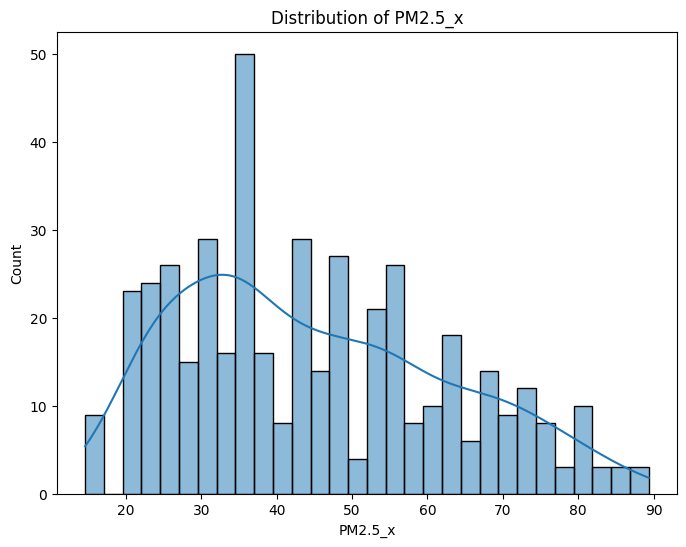

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of PM2.5_x
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['PM2.5_x'], bins=30, kde=True)
plt.xlabel('PM2.5_x')
plt.title('Distribution of PM2.5_x')
plt.show()


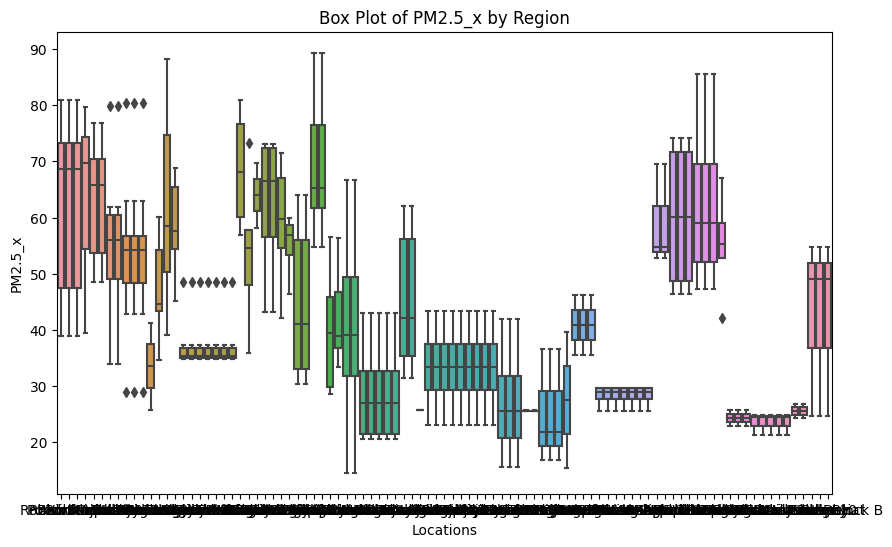

In [14]:
# Box plot of PM2.5_x by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='LOCATIONS', y='PM2.5_x', data=merged_data)
plt.xlabel('Locations')
plt.ylabel('PM2.5_x')
plt.title('Box Plot of PM2.5_x by Region')
plt.show()


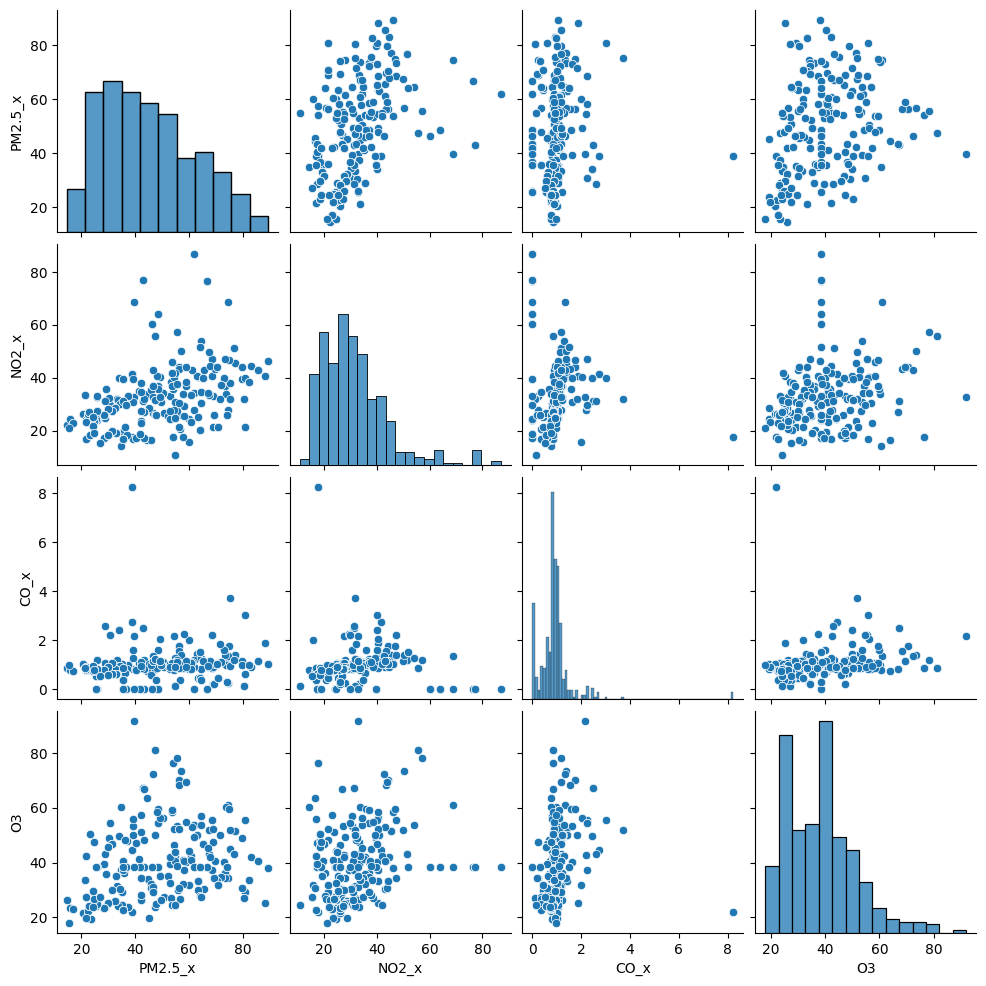

In [15]:
# Pair plot of selected numerical variables
sns.pairplot(merged_data[['PM2.5_x', 'NO2_x', 'CO_x', 'O3']])
plt.show()


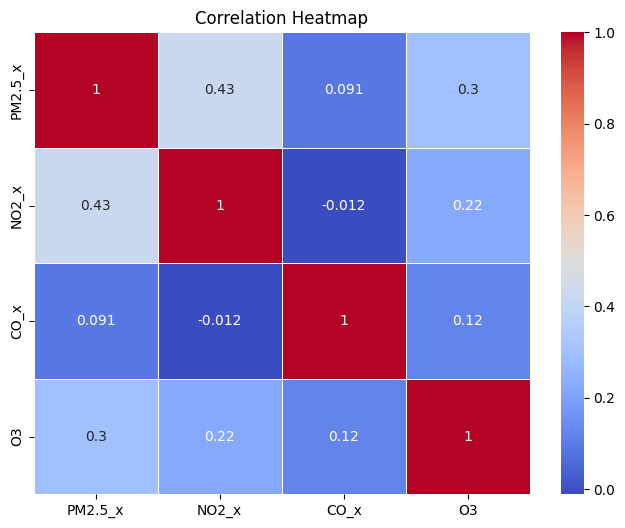

In [16]:
# Correlation heatmap of numerical variables
corr_matrix = merged_data[['PM2.5_x', 'NO2_x', 'CO_x', 'O3']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

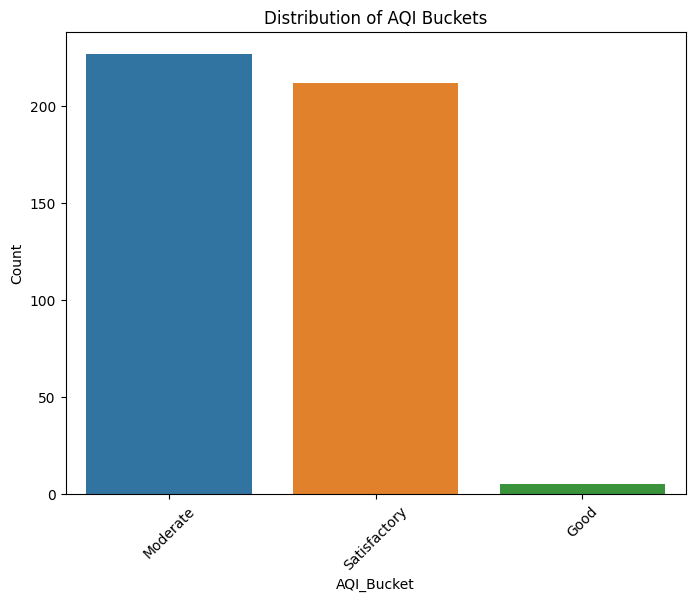

In [17]:
# Bar chart of AQI_Bucket counts
plt.figure(figsize=(8, 6))
sns.countplot(x='AQI_Bucket', data=merged_data)
plt.xlabel('AQI_Bucket')
plt.ylabel('Count')
plt.title('Distribution of AQI Buckets')
plt.xticks(rotation=45)
plt.show()

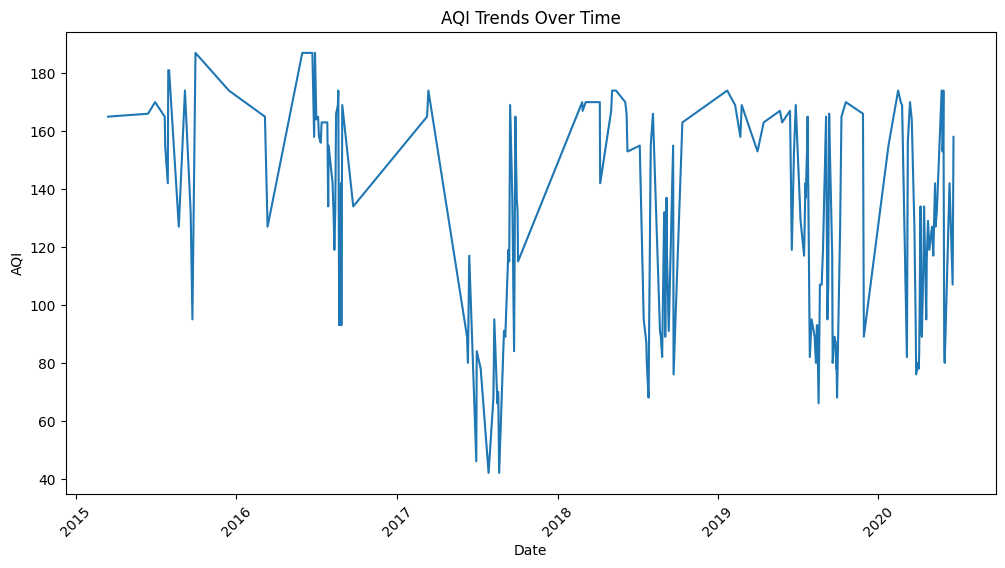

In [18]:
# Time series plot of AQI values
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='AQI', data=merged_data)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Trends Over Time')
plt.xticks(rotation=45)
plt.show()

<ipython-input-19-31b7772cc1a9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_disease = merged_data[['PM2.5_x', 'NO2_x', 'CO_x', 'O3', 'Health Risks']].corr()


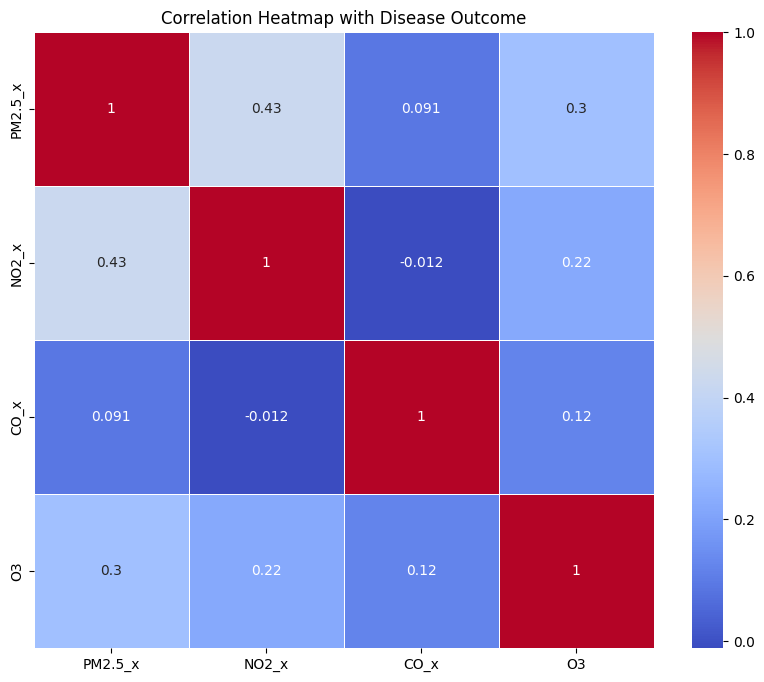

In [19]:
# Correlation heatmap with the disease outcome variable
corr_with_disease = merged_data[['PM2.5_x', 'NO2_x', 'CO_x', 'O3', 'Health Risks']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_disease, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap with Disease Outcome')
plt.show()


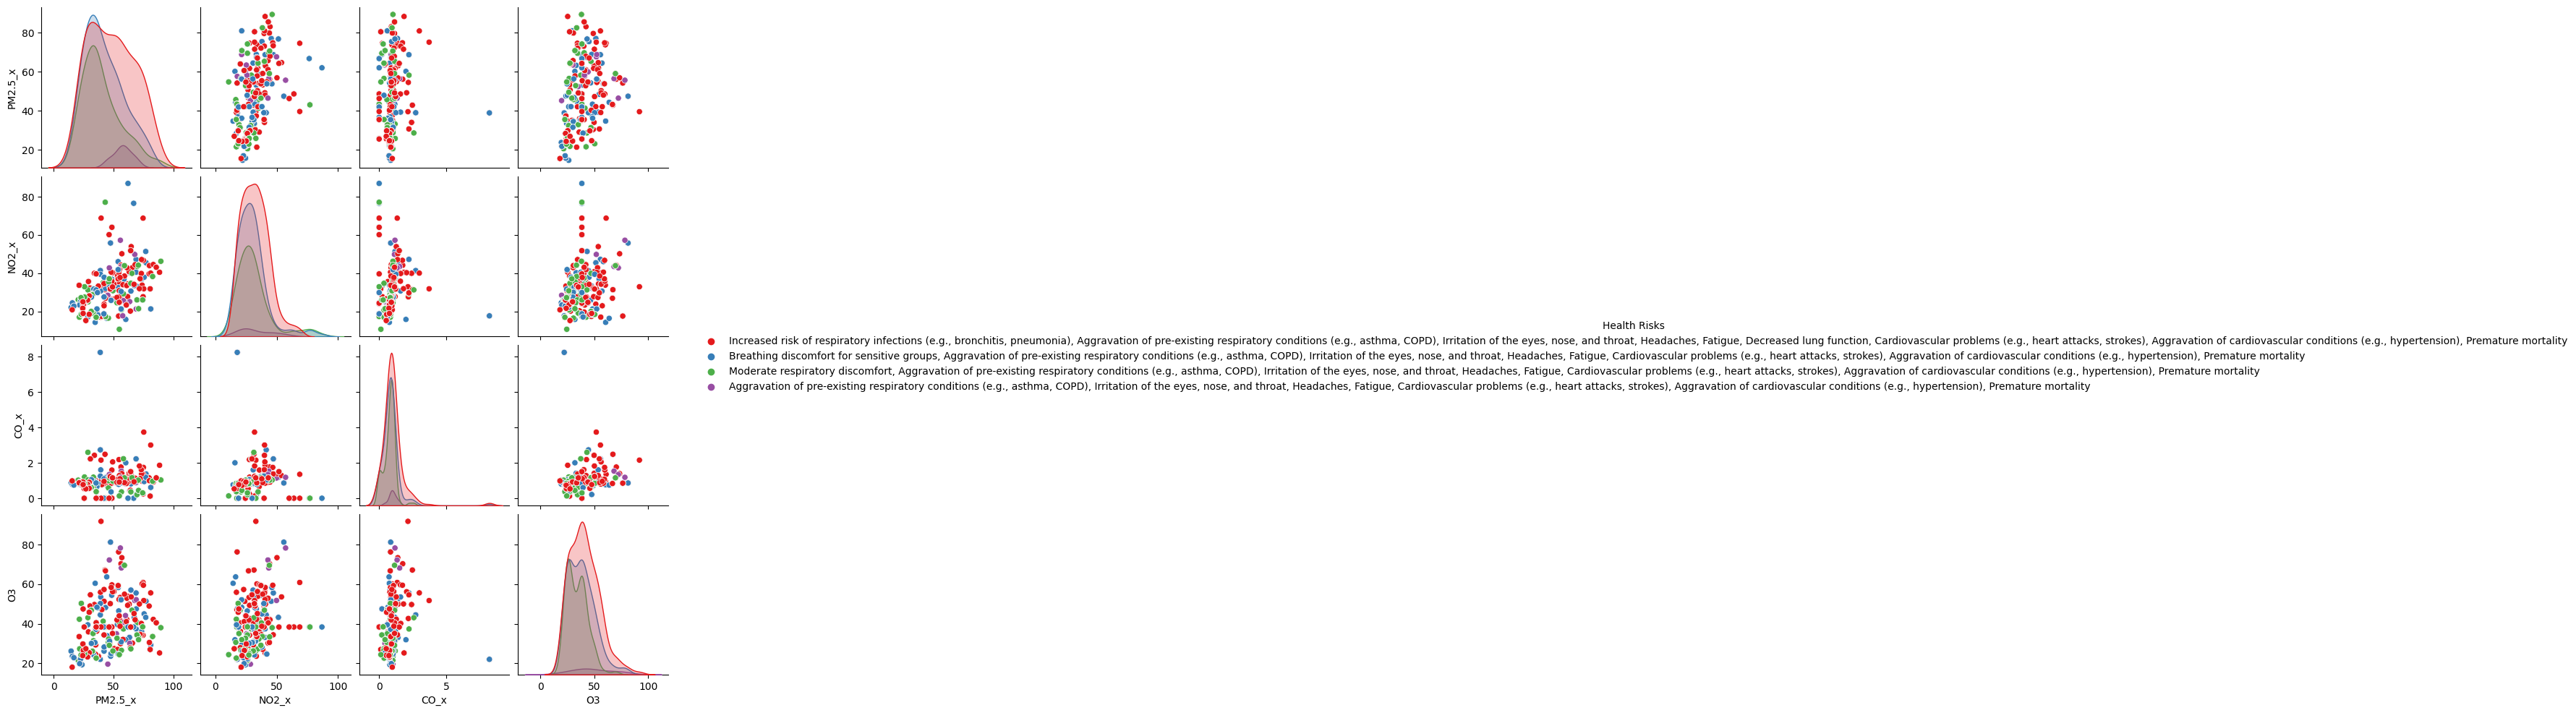

In [24]:
# Pair plot of selected air quality features by disease category
sns.pairplot(merged_data[['PM2.5_x', 'NO2_x', 'CO_x', 'O3', 'Health Risks']], hue='Health Risks', palette='Set1')
plt.show()

LINEAR REGRESSION


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [68]:
merged_data.columns

Index(['City', 'Date', 'PM2.5_x', 'PM10_x', 'NO', 'NO2_x', 'NOx', 'NH3',
       'CO_x', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI',
       'AQI_Bucket', 'LOCATIONS', 'Status', 'AQI-US', 'PM2.5_y', 'PM10_y',
       'Health Risks', 'Year', 'Month', 'Day', 'DayOfWeek',
       'NO2_CO_Interaction', 'PM2.5_MonthlyAvg', 'PM10_MonthlyAvg', 'NO2_y',
       'CO_y'],
      dtype='object')

In [69]:
x = merged_data[['PM2.5_x', 'PM10_x', 'NO', 'NO2_x', 'NO', 'NH3', 'CO_x',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'PM2.5_y', 'PM10_y']]
y = merged_data['AQI']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)


X_train shape: (355, 14)
X_test shape: (89, 14)
y_train shape: (355,)
y_test shape: (89,)


LinearRegression()

MODEL PREDICTION

In [70]:
y_pred = model.predict(X_test)
y_pred.shape

(89,)

In [71]:
predicted_AQI=y_pred
print("Predicted_AQI = ",y_pred)

Predicted_AQI =  [ 77.22850428  99.09860429 123.76162296 101.66352049 127.83918834
  82.14911143  84.83735357 106.24007612  99.53719873  85.87672607
  81.59761151 136.78875884  85.12151335 125.96012383  76.24783375
  85.60548895  81.07887935  93.14541357 136.78875884  89.4564452
 175.10547876  93.21997457 138.83824266 170.34394522 160.5222711
 107.5858439   85.85819391  98.84850062 123.07230224  91.15306817
 134.51151691 134.31644641 170.79844692  93.20101004  91.05667383
  81.94525767 127.83918834  83.99476242  79.38215527  86.91877432
 123.76162296 142.37630437  90.2033443   97.82972579 173.0813716
 127.42285213 136.74551713 173.17438091  90.04273225  91.08756076
  82.69317024  97.19856744 175.42670286 121.39429122 167.48497202
  83.97623026  97.38388903 172.97050816 165.62745217  86.88788738
  85.14004551 137.59541395  68.29585392 111.46231835  95.04600915
  82.36221663 187.94052662 122.23000315 106.11586851 173.17584123
 172.99316145 111.51885093 105.28343485 180.97664782 142.41954

MODEL EVALUATION


In [72]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error,r2_score

In [73]:
mean_squared_error(y_test,y_pred)

78.512685938905

In [74]:
mean_absolute_error(y_test,y_pred)

7.085575001290052

In [75]:
mean_absolute_percentage_error(y_test,y_pred)

0.059893776391497185

In [76]:
r2_score(y_test,y_pred)

0.935797997880983

FUTURE PREDICTION

In [77]:
df_new = merged_data.sample(1)
df_new

,City,Date,PM2.5_x,PM10_x,NO,NO2_x,NOx,NH3,CO_x,SO2,...,Health Risks,Year,Month,Day,DayOfWeek,NO2_CO_Interaction,PM2.5_MonthlyAvg,PM10_MonthlyAvg,NO2_y,CO_y
47,Delhi,2020-03-13,68.72,209.02,29.31,40.53,49.0,31.36,0.87,15.42,...,Increased risk of respiratory infections (e.g....,2020.0,3.0,13.0,4.0,35.2611,43.690714,94.175,31.469286,0.837857


In [82]:
x_new = df_new[['PM2.5_x', 'PM10_x', 'NO', 'NO2_x', 'NO', 'NH3', 'CO_x',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'PM2.5_y', 'PM10_y']]
x_new.shape

(1, 14)

In [83]:
y_pred_new = model.predict(x_new)
print("Predicted value :",y_pred_new)

Predicted value : [171.43895011]


RANDOM FOREST MODEL

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [94]:
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
numerical_cols = merged_data.select_dtypes(include=['number']).columns
categorical_cols = merged_data.select_dtypes(include=['object']).columns

# Handle missing values in numerical columns
numerical_imputer = SimpleImputer(strategy='mean')
merged_data[numerical_cols] = numerical_imputer.fit_transform(merged_data[numerical_cols])

# Handle missing values in categorical columns
merged_data[categorical_cols] = merged_data[categorical_cols].fillna('Unknown')


In [100]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode categorical variables
merged_data['City'] = label_encoder.fit_transform(merged_data['City'])
merged_data['Health Risks'] = label_encoder.fit_transform(merged_data['Health Risks'])

# Encode categorical variables 'AQI_Bucket' and 'City'
merged_data['AQI_Bucket'] = label_encoder.fit_transform(merged_data['AQI_Bucket'])
merged_data['City'] = label_encoder.fit_transform(merged_data['City'])


In [101]:
# Define features (X) and target variable (y)
features = ['City', 'PM2.5_x', 'PM10_x', 'NO', 'NO2_x', 'NOx', 'NH3', 'CO_x', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Year', 'Month', 'Day', 'DayOfWeek', 'NO2_CO_Interaction', 'PM2.5_MonthlyAvg', 'PM10_MonthlyAvg', 'NO2_y', 'CO_y']
X = merged_data[features]
y = merged_data['Health Risks']

In [102]:
# Split the dataset into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
# Create and train the Random Forest model
health_risk_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here
health_risk_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [104]:
# Evaluate the model's performance
y_pred = health_risk_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.15      0.17      0.16        30
           2       0.51      0.43      0.47        46
           3       0.12      0.15      0.13        13

    accuracy                           0.30        89
   macro avg       0.26      0.25      0.25        89
weighted avg       0.33      0.30      0.32        89



In [116]:
df_new1 = merged_data.sample(2)
df_new1

,City,Date,PM2.5_x,PM10_x,NO,NO2_x,NOx,NH3,CO_x,SO2,...,Health Risks,Year,Month,Day,DayOfWeek,NO2_CO_Interaction,PM2.5_MonthlyAvg,PM10_MonthlyAvg,NO2_y,CO_y
369,0,2020-04-08,29.70,79.04,8.38,18.56,16.51,23.41,0.56,12.85,...,1,2020.0,4.0,8.0,2.0,10.3936,37.509545,83.563864,20.320682,0.688864
208,0,2020-02-24,70.59,145.05,29.23,44.20,51.60,33.19,1.02,15.94,...,2,2020.0,2.0,24.0,0.0,45.0840,66.094000,127.172000,39.902000,0.922000


In [124]:
x_new1 = df_new1[['City', 'PM2.5_x', 'PM10_x', 'NO', 'NO2_x', 'NOx', 'NH3', 'CO_x', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Year', 'Month', 'Day', 'DayOfWeek', 'NO2_CO_Interaction', 'PM2.5_MonthlyAvg', 'PM10_MonthlyAvg', 'NO2_y', 'CO_y']]

# Make predictions using the trained Random Forest model
y_pred_new1 = health_risk_model.predict(x_new1)

# Print the predicted value
print("Predicted Health Risks for new data:", y_pred_new1)


Predicted Health Risks for new data: [2 3]
